# Breast Cancer Prediction - Data Wizards Consulting

Breast cancer is one of the most common types of cancer in the UK. According to NHS, about 1 in 8 women are diagnosed with breast cancer during their lifetime, and early detection will significantly increase the chance of recovery.
​

Goal: train a machine learning model which predicts whether the cancer is benign or malignant.

## Data Pre-processing

The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


### Data exploration and visualisation
   

#### Import necessary libraries for data exploration, pre-processing and ML

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.cluster as clust
from scipy.spatial.distance import cdist
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import os


#### Import core python libraries
import pandas as pd
import pickle
import os
import numpy as np
from IPython.display import Math
from itertools import product

#### Import machine learning and stats libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score, make_scorer, precision_recall_fscore_support)
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.append("breastcancerprediction/models/")

from functions import *

import sys
sys.path.append("../src/")
from standard_fns import *

In [17]:
# Read the data from the 'data' folder
df_raw = pd.read_csv("../data/raw/data.csv", sep = ",")

#### Data Exploration

In [22]:
# Number of columns and records available 
df_raw.head(5)
df_raw.shape

(569, 33)

In [23]:
# Data types
df_raw.get_dtype_counts()

AttributeError: 'DataFrame' object has no attribute 'get_dtype_counts'

In [20]:
# ID coded as int and diagnosis coded as object
# The raw dataset has 569 rows and 33 columns
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dropping empty column Unnamed: 32 and ID column 

In [24]:
df = df_raw.drop(['Unnamed: 32','id'], axis =1)

No null values are present in the rest of the data, so we proceed with getting a summary of the numerical features in the data set

In [25]:
#Checking for missing values

print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [26]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Area mean looks very high compared to other values

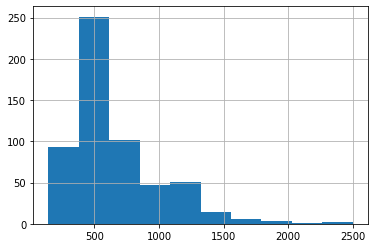

In [27]:
df["area_mean"].hist()

Inspecting class distribution of diagnosis variable

In [28]:
df['diagnosis'].value_counts()/len(df['diagnosis'])

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

##### Data Scaling 



In [29]:
# Scale numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df.loc[:, numeric_cols] = scaler.fit_transform(df.loc[:, numeric_cols])

In [30]:
#Recoding diagnosis to 1 for malignant and 0 for benign
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

Recoding target variable to boolean

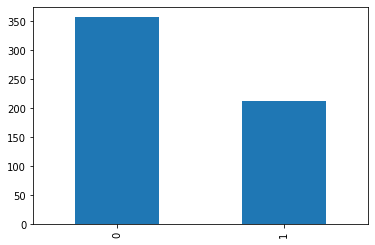

In [31]:
df['diagnosis'].value_counts().plot(kind='bar')

target = df['diagnosis']

In [32]:
df1 = df.drop(['diagnosis'], axis =1)

In [33]:
selected_cols = get_PBS_corr_from_cols(df, 'diagnosis',numeric_cols, thresh = 0.1)
print(selected_cols)

                      index      corr
27     concave points_worst  0.793566
22          perimeter_worst  0.782914
7       concave points_mean  0.776614
20             radius_worst  0.776454
2            perimeter_mean  0.742636
23               area_worst  0.733825
0               radius_mean  0.730029
3                 area_mean  0.708984
6            concavity_mean  0.696360
26          concavity_worst  0.659610
5          compactness_mean  0.596534
25        compactness_worst  0.590998
10                radius_se  0.567134
12             perimeter_se  0.556141
13                  area_se  0.548236
21            texture_worst  0.456903
24         smoothness_worst  0.421465
28           symmetry_worst  0.416294
1              texture_mean  0.415185
17        concave points_se  0.408042
4           smoothness_mean  0.358560
8             symmetry_mean  0.330499
29  fractal_dimension_worst  0.323872
15           compactness_se  0.292999
16             concavity_se  0.253730


In [34]:
df_new = df[selected_cols['index'].tolist()]
df_new.head

<bound method NDFrame.head of      concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                2.296076         2.303601             2.532475      1.886690   
1                1.087084         1.535126             0.548144      1.805927   
2                1.955000         1.347475             2.037231      1.511870   
3                2.175786        -0.249939             1.451707     -0.281464   
4                0.729259         1.338539             1.428493      1.298575   
..                    ...              ...                  ...           ...   
564              1.629151         1.752563             2.320965      1.901185   
565              0.733827         1.421940             1.263669      1.536720   
566              0.414069         0.579001             0.105777      0.561361   
567              2.289985         2.303601             2.658866      1.961239   
568             -1.745063        -1.432735            -1.261820     -1.410893  

#### Correlation

Some variables are highly correlated and so we will calculate VIF (Variance Inflation Factor) to systematically remove highly correlated variables and reduce multicollinearity

In [35]:
#import itertools
#cols = np.asarray(df_ex_diag.columns)
#x = np.asarray(list(itertools.combinations(cols,2)))

get_VIF(df_new)

array([[  1.        ,   5.44431317,  11.13031886,   4.70419663,
          4.37140868,   3.95912288,   3.90952114,   3.59733745,
          7.21100285,   6.9172491 ,   5.42220614,   5.02715581,
          2.13247956,   2.24667216,   2.16528164,   1.56190113,
          2.21087749,   2.01016538,   1.41907547,   2.51540437,
          2.01228846,   1.75529937,   2.04546724,   1.9350157 ,
          1.7872215 ],
       [  5.44431317,   1.        ,   6.94073925, 158.92985796,
         33.76882402,  44.59923632,  28.6833049 ,  24.46158484,
          3.69774508,   2.62016111,   2.44027683,   2.1249816 ,
          3.5674    ,   3.58463167,   4.18782629,   1.57504684,
          1.31022894,   1.36891184,   1.55772842,   1.65289052,
          1.31380602,   1.28068613,   1.161382  ,   1.35229401,
          1.29312646],
       [ 11.13031886,   6.94073925,   1.        ,   5.89336421,
          6.71037542,   5.25291802,   5.63470826,   5.65831267,
         12.72119395,   4.03876402,   5.92189178,   3.0070

In [36]:
final_df = drop_multicollinear_features(5,df_new)


In order to select independent variables predictive of the diagnosis status we calculate variance inflation factor between each pair of variables and drop one that is highly correlated. The calculate_vif() function returns the names of predictors with VIF < 5.

Final dataset includes texture_mean, smoothness_mean, symmetry_mean, fractal_dimension_mean, texture_se, perimeter_se,
 smoothness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, symmetry_worst anddiagnosis.

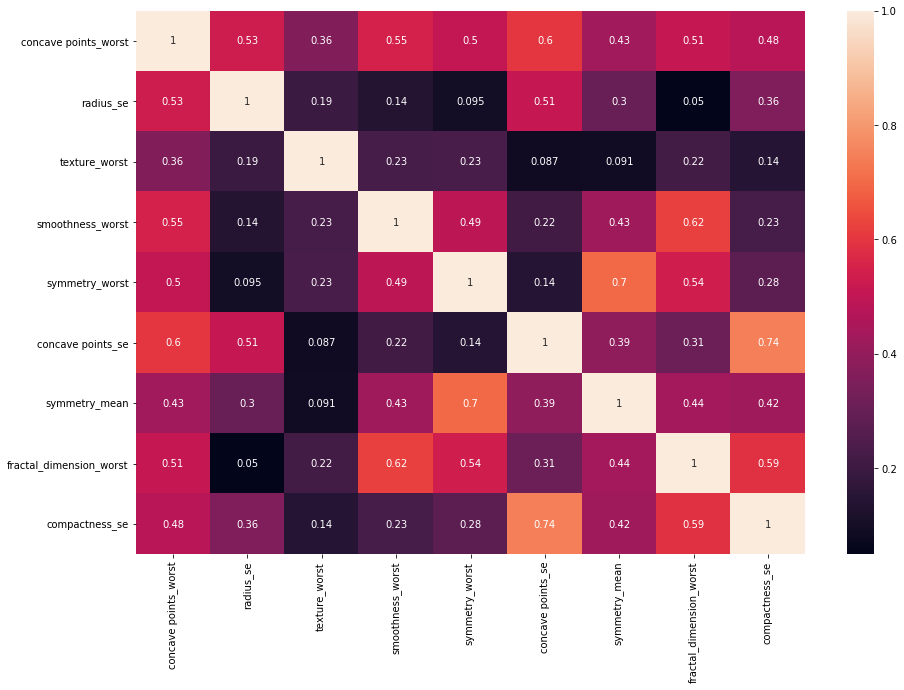

In [37]:
plt.figure(figsize = (15,10))
correlation_matrix = final_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

In [38]:
#sns.pairplot(final_df)

 If one of the individual scatterplots in the matrix shows a linear relationship between variables, this is an indication that those variables are exhibiting multicollinearity.

## Machine Learning Models 

Due to the nature of the problem requiring to build a model which can classify the nature of the tumour as benign or malignant, we concluded that the most suitable ML algorithm is a classification one. 

Considering that each record in the data was already labelled with the diagnosis, malignant(M) vs benign (B), we decided to experiment with supervised ML algorithms. 

##### Problem type: Classification problem 
##### Algorithm: Supervised learning

After deciding the type of problem and algorithm needed to be investigated, we split the data in training data (80% of the entire data set) and test data (20% of the entire data set) - a frequently used practice in the field. 

In [39]:
# Splitting the data into training and testing sets - a frequent test set size is 20%-30% of the original dataset

target = df['diagnosis']


X = final_df.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2, random_state = 33)

In [40]:
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

 X_train: (455, 9)
 X_test: (114, 9)
 y_train: (455,)
 y_test: (114,)


### Algorithms 

The algorithms we experimented with are the following: 
- Logistic Regression 
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

#### Logistic Regression

" Logistic regression models the probability that a response falls into a specific category. Once trained we may use the confusion matrix to evaluate the classification. The four values are true positive (predicted yes and actually was yes), true negative (predict no and actually was no), false positive (predicted yes and actually was no) and false negative (predicted no and actually was yes)." (Keith Brooks, 2018)

In [41]:
# Logistic regression, so we can investigate ROC and AUC
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)
pred_clf_logit = clf_logit.predict(X_test)
proba_clf_logit = clf_logit.predict_proba(X_test)

###### Feature Importance

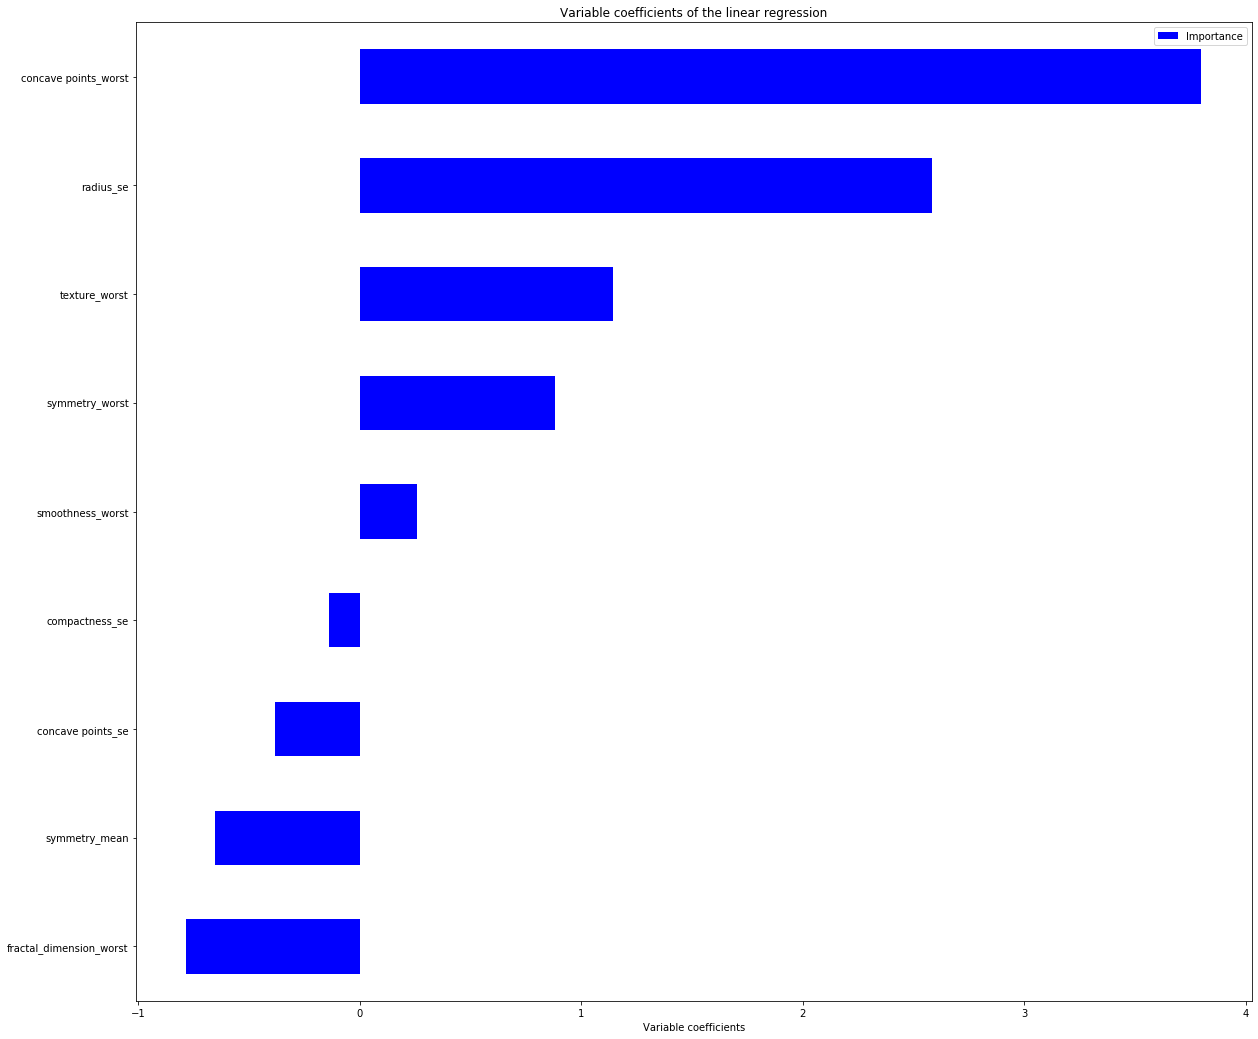

In [42]:
# Plot feature importance
coefs = pd.DataFrame(clf_logit.coef_.reshape((9, 1)), 
                         index = final_df.columns.tolist(), columns = ['Importance'])
coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the linear regression')
plt.show()

In [43]:
thres = 0.5
target_predict_logit = np.where(proba_clf_logit[:,1] > thres, 1, 0)# How many actual "positive" (malignant) cases do we have in our train/test dataset? 
target_actual = y_test

#final_df['diagnosis'].value_counts() 
# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

In [44]:
# How many "positive" (e.g., >50k) cases do we predict with the logistic regression?

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 36.84% (42/114)


###### Confusion Matrix

"A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made." (GeeksforGeeks)

Confusion matrix, without normalization
[[70  1]
 [ 2 41]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 4.65116279 95.34883721]]


<Figure size 432x288 with 0 Axes>

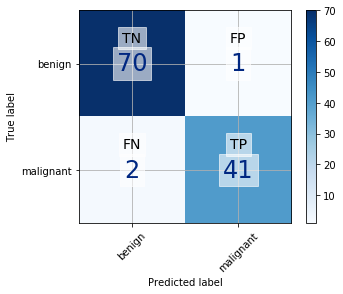

<Figure size 432x288 with 0 Axes>

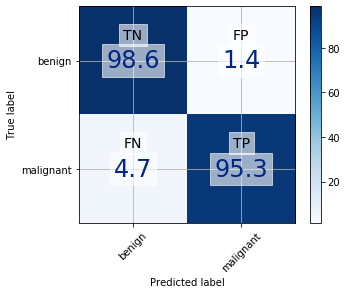

<Figure size 432x288 with 0 Axes>

In [45]:
class_names = ['benign', 'malignant']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

##### Accuracy & Precision

"Accuracy and precision are two important factors to consider when taking data measurements. Both accuracy and precision reflect how close a measurement is to an actual value, but accuracy reflects how close a measurement is to a known or accepted value, while precision reflects how reproducible measurements are, even if they are far from the accepted value." ( Anne Marie Helmenstine, Ph.D., 2019)

In [46]:
log_acc = round((log_tp + log_tn) / X_test.shape[0], 3) * 100
print('Logistic regression accuracy: {:.2f}%'.format(log_acc))

log_precision = round((log_tp / (log_tp + log_fp)), 2) * 100
print('Logistic regression precision: {:.2f}%'.format(log_precision))

Logistic regression accuracy: 97.40%
Logistic regression precision: 95.00%


##### Tunning

In [47]:
## Tune Logistic Regression
random_state = 33
cv=5

## Tune Logistic Regression
clf_log = LogisticRegression(random_state=random_state)

log_params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_grid = GridSearchCV(clf_log, log_params, cv=cv);
log_grid.fit(X_train, y_train);


In [48]:
log_pred = log_grid.predict_proba(X_test) [:, 1]
fpr_log, tpr_log, _ = roc_curve(target_actual, log_pred)


##### Receiver Operating Characteristic (ROC) curve

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

We plotted the ROC curce to assess the performce of our logistic regression model as seen below. 

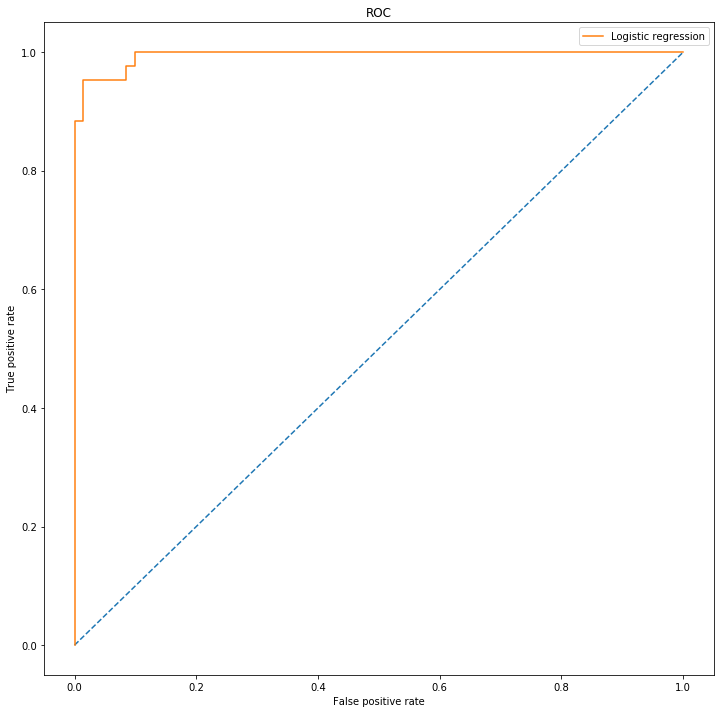

In [49]:
# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], '--')
#plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
#plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

#### Decision Tree 

"Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features." (Scikit Learn, 2019)

In [57]:
# Decision tree 
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=10, max_features=None)
clf_dt.fit(X_train, y_train)
pred_clf_dt = clf_dt.predict(X_test)
proba_clf_dt = clf_dt.predict_proba(X_test)

In [58]:
target_predict_tree = np.where(proba_clf_dt[:,1] > thres, 1, 0)

##### Confusion Matrix

Confusion matrix, without normalization
[[68  3]
 [ 6 37]]
Normalized confusion matrix
[[95.77464789  4.22535211]
 [13.95348837 86.04651163]]


<Figure size 432x288 with 0 Axes>

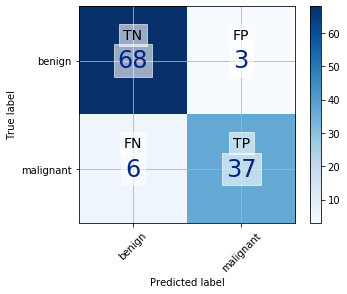

<Figure size 432x288 with 0 Axes>

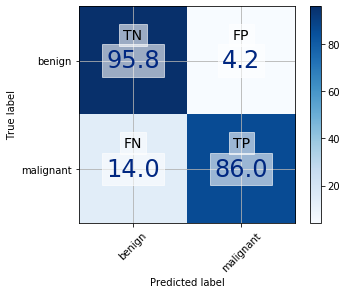

In [59]:
# Plot the confusion matrix for the decision tree
tree_cfn = confusion_matrix(target_actual, target_predict_tree)
tree_tn, tree_fn, tree_fp, tree_tp = confusion_matrix(target_actual, target_predict_tree).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

##### Accuracy & Precision

In [60]:
tr_acc = round((tree_tp + tree_tn) / X_test.shape[0], 3) * 100
print('Decision tree accuracy: {:.2f}%'.format(tr_acc))

tr_precision = round((tree_tp / (tree_tp + tree_fp)), 2) * 100
print('Decision tree precision: {:.2f}%'.format(tr_precision))

Decision tree accuracy: 92.10%
Decision tree precision: 86.00%


##### Tunning

In [61]:
## Tune Decision Tree
num_leaves = [1, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
tree_params = {"max_depth": depths, "min_samples_leaf": num_leaves}

clf_tree = DecisionTreeClassifier(random_state=random_state)
tree_grid = GridSearchCV(clf_tree, tree_params, cv=cv);
tree_grid.fit(X_train, y_train);
tree_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

##### Boosting

In [81]:
#Run Decision Tree algorithm using tuned hyper-params
tuned_depth = tree_grid.best_params_['max_depth']
tuned_samples = tree_grid.best_params_['min_samples_leaf']

clf_dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth= tuned_depth, min_samples_split=20, 
                             min_samples_leaf= tuned_samples, max_features=None)

clf_dt_tuned.fit(X_train, y_train)
y_pred_tuned = clf_dt_tuned.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred_tuned)
tuned_prec = precision_score(y_test, y_pred_tuned)

In [82]:
print('Tuned Decision tree accuracy: {:.2f}%'.format(tuned_acc*100))
print('Tuned Decision tree precision: {:.2f}%'.format(tuned_prec*100))

Tuned Decision tree accuracy: 90.35%
Tuned Decision tree precision: 90.00%


In [83]:
adb_classifier = AdaBoostClassifier(clf_dt_tuned,
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=33,)
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
boost_acc = accuracy_score(y_test, y_pred_adb)
boost_prec = precision_score(y_test, y_pred_adb)

In [84]:
print('Boosted Decision tree accuracy: {:.2f}%'.format(boost_acc*100))
print('Boosted Decision tree precision: {:.2f}%'.format(boost_prec*100))

Boosted Decision tree accuracy: 92.11%
Boosted Decision tree precision: 92.50%


In [ ]:
#Run Decision Tree algorithm using tuned hyper-params

##### Tuned Boosting

In [119]:
clf_dt_boostst = AdaBoostClassifier(clf_dt_tuned,
                                  algorithm = 'SAMME.R', 
                                  random_state = 33 )
cv = 5

scoring = {'Accuracy' : make_scorer(accuracy_score), 'Precision': make_scorer(precision_score)}

params = {
    'n_estimators': [5,50,100,2000],
    'learning_rate': [0.1,0.2,0.4,0.8]
}

tuned_boost_grid = GridSearchCV(estimator = clf_dt_boost, param_grid = params, scoring= scoring, n_jobs=3, 
                        iid=True, refit= 'Accuracy', cv = cv, verbose=0, pre_dispatch='2*n_jobs', 
                        error_score='raise', return_train_score='warn')

tuned_boost_grid.fit(X_train, y_train)

print(tuned_boost_grid.best_params_)

{'learning_rate': 0.4, 'n_estimators': 2000}


In [120]:
tuned_boost_dt = tuned_boost_grid.best_estimator_

#### Random Forest 

"The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
- Random sampling of training data points when building trees
- Random subsets of features considered when splitting nodes" 
(Will Koehrsen, 2018)

In [121]:
# Random forest 
clf_rf = RandomForestClassifier(random_state = 33, n_estimators=50, max_depth=5, 
                                min_samples_leaf=30, max_features=4)
clf_rf.fit(X_train, y_train)
pred_clf_rf = clf_rf.predict(X_test)
proba_clf_rf = clf_rf.predict_proba(X_test)

In [122]:
# Check probabilities - note this gives the probabilities associated with labels 0 and 1, respectively
print(proba_clf_rf)

[[0.19353155 0.80646845]
 [0.96173764 0.03826236]
 [0.92291375 0.07708625]
 [0.88920001 0.11079999]
 [0.83184133 0.16815867]
 [0.9158274  0.0841726 ]
 [0.99358267 0.00641733]
 [0.9914738  0.0085262 ]
 [0.97715504 0.02284496]
 [0.6666492  0.3333508 ]
 [0.87014567 0.12985433]
 [0.08374742 0.91625258]
 [0.96454453 0.03545547]
 [0.29412084 0.70587916]
 [0.90881296 0.09118704]
 [0.30802703 0.69197297]
 [0.90411894 0.09588106]
 [0.78550029 0.21449971]
 [0.88968698 0.11031302]
 [0.73342529 0.26657471]
 [0.24848774 0.75151226]
 [0.99513179 0.00486821]
 [0.97476406 0.02523594]
 [0.97963266 0.02036734]
 [0.07815557 0.92184443]
 [0.09319516 0.90680484]
 [0.15684532 0.84315468]
 [0.79919441 0.20080559]
 [0.6543299  0.3456701 ]
 [0.93455901 0.06544099]
 [0.88314686 0.11685314]
 [0.98656764 0.01343236]
 [0.71321725 0.28678275]
 [0.78905862 0.21094138]
 [0.99433179 0.00566821]
 [0.24709525 0.75290475]
 [0.27563978 0.72436022]
 [0.96947147 0.03052853]
 [0.69579084 0.30420916]
 [0.92227803 0.07772197]


In [123]:
target_predict_rf = np.where(proba_clf_rf[:,1] > thres, 1, 0)

##### Confusion Matrix

Confusion matrix, without normalization
[[69  2]
 [ 6 37]]
Normalized confusion matrix
[[97.18309859  2.81690141]
 [13.95348837 86.04651163]]


<Figure size 432x288 with 0 Axes>

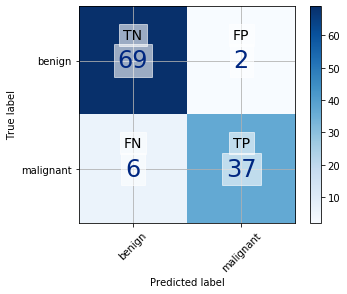

<Figure size 432x288 with 0 Axes>

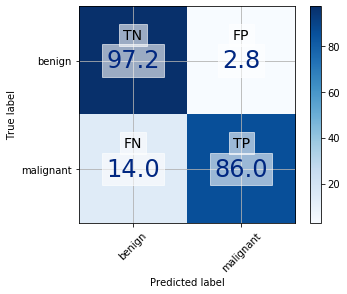

In [124]:
# Plot the confusion matrix for the random forest
rf_cfn = confusion_matrix(target_actual, target_predict_rf)
rf_tn, rf_fn, rf_fp, rf_tp = confusion_matrix(target_actual, target_predict_rf).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

##### Accuracy & Precision

In [125]:
rf_acc = round((rf_tp + rf_tn) / X_test.shape[0], 3) * 100
print('Random forest accuracy: {:.2f}%'.format(rf_acc))

rf_precision = round((rf_tp / (rf_tp + rf_fp)), 2) * 100
print('Random forest precision: {:.2f}%'.format(rf_precision))

Random forest accuracy: 93.00%
Random forest precision: 86.00%


##### Tunning

In [126]:
## Tune Random Forest

clf_rf = RandomForestClassifier(random_state=random_state)


'''
Define the parameter grid for the. Random Forest:
- max_features: maximum number of features to split the tree nodes on
- n_estimators: number of trees to build
- max_depth: maximum number of layers in each tree

''' 
scoring = {'Accuracy' : make_scorer(accuracy_score), 'Precision': make_scorer(precision_score)}

params = {
    'max_features': [4,5],
    'n_estimators': [5,10],
    'max_depth': [1,10]
}

rf_grid = GridSearchCV(estimator = clf_rf, param_grid = params, scoring= scoring, n_jobs=3, 
                        iid=True, refit= 'Accuracy', cv=cv, verbose=0, pre_dispatch='2*n_jobs', 
                        error_score='raise', return_train_score='warn')


rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)


{'max_depth': 10, 'max_features': 5, 'n_estimators': 5}


###### Performance plot

In [91]:
plot_performance(rf_grid.cv_results_)

NameError: name 'plot_performance' is not defined

#### Support Vector Machine (SVM)

"Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation." 

(Scikit Learn, 2019)

In [127]:
# SVM 
clf_svm = SVC(kernel = 'linear', random_state = 33, probability = True)
clf_svm.fit(X_train, y_train)
pred_clf_svm = clf_svm.predict(X_test)
proba_clf_svm = clf_svm.predict_proba(X_test)
target_predict_svm = np.where(proba_clf_svm[:,1] > thres, 1, 0)

##### Confusion Matrix

Confusion matrix, without normalization
[[70  1]
 [ 2 41]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 4.65116279 95.34883721]]


<Figure size 432x288 with 0 Axes>

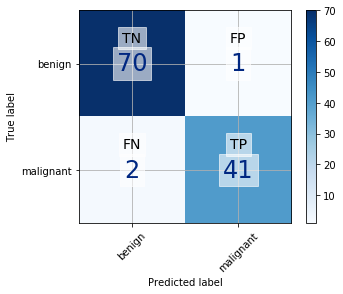

<Figure size 432x288 with 0 Axes>

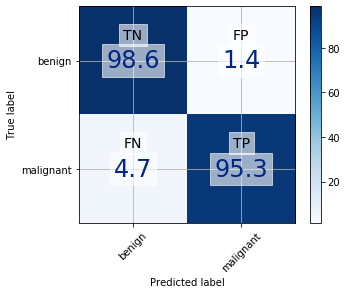

In [128]:
# Plot the confusion matrix for SVM
svm_cfn = confusion_matrix(target_actual, target_predict_svm)
svm_tn, svm_fn, svm_fp, svm_tp = confusion_matrix(target_actual, target_predict_svm).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

##### Accuracy & Precision

In [129]:
# SVM accuracy
svm_acc = round((svm_tp + svm_tn) / X_test.shape[0], 3) * 100
print('SVM accuracy: {:.2f}%'.format(svm_acc))

SVM accuracy: 97.40%


##### Tunning

In [130]:
## Tune SVM

clf_svm = SVC(kernel = 'linear', random_state=random_state, probability = True)

'''
Define the parameter grid for the. Random Forest:
- max_features: maximum number of features to split the tree nodes on
- n_estimators: number of trees to build
- max_depth: maximum number of layers in each tree

''' 

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ["linear", "rbf", "poly"],
}

svm_grid = GridSearchCV(estimator = clf_svm, param_grid = params, scoring=None, n_jobs=3, 
                        iid=True, refit=True, cv=cv, verbose=0, pre_dispatch='2*n_jobs', 
                        error_score='raise', return_train_score='warn');


svm_grid.fit(X_train, y_train);

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## Model evaluation & comparison

### ROC Curve

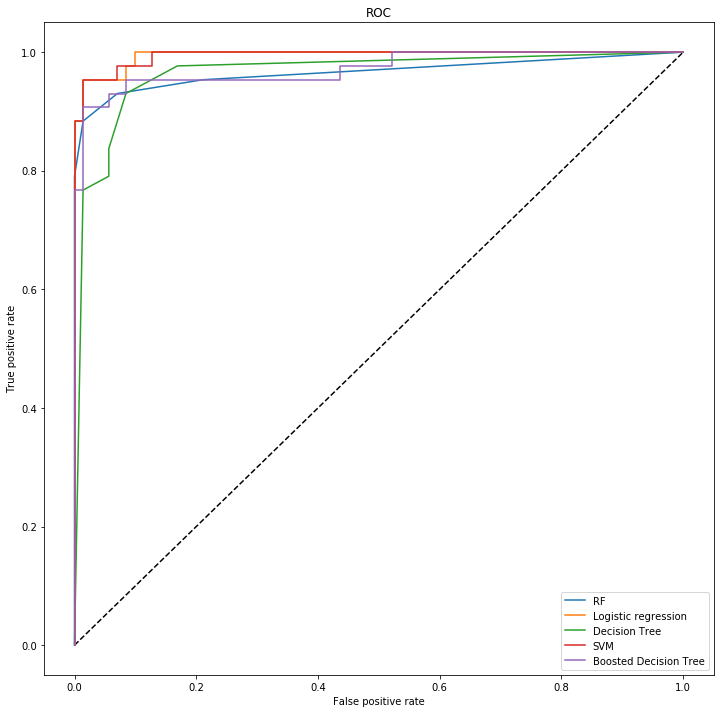

In [131]:
# Let's make the predictions and evaluate our model
rf_pred = rf_grid.predict_proba(X_test)[:, 1]
log_pred = log_grid.predict_proba(X_test)[:, 1]
tree_pred = tree_grid.predict_proba(X_test)[:, 1]
svm_pred = svm_grid.predict_proba(X_test)[:, 1]
tuned_boost_pred = tuned_boost_dt.predict_proba(X_test)[:, 1]


# Let's get the false positive rate and the true positive rate, to build our ROC curve
fpr_rf, tpr_rf, _ = roc_curve(target_actual, rf_pred)
fpr_log, tpr_log, _ = roc_curve(target_actual, log_pred)
fpr_tree, tpr_tree, _ = roc_curve(target_actual, tree_pred)
fpr_svm, tpr_svm, _ = roc_curve(target_actual, svm_pred)
fpr_tuned_btree, tpr_tuned_btree, _ = roc_curve(target_actual, tuned_boost_pred)




# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_tuned_btree, tpr_tuned_btree, label='Boosted Decision Tree')



plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

### Area Under the Curve (AUC) 

"AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease." (Sarang Narkhede, 2018)

In [132]:
#  Let's have a look at each model's AUC - What do these indicate?

log_auc = auc(fpr_log, tpr_log)
tree_auc = auc(fpr_tree, tpr_tree)
rf_auc = auc(fpr_rf, tpr_rf)
svm_auc = auc(fpr_svm, tpr_svm)
btree_auc = auc(fpr_tuned_btree, tpr_tuned_btree)

print("------ AUC values for each model ------")
print()
print("Logistic regression: %.4f" %log_auc)
print("Decision Tree: %.4f" %tree_auc)
print("Random Forest: %.4f" %rf_auc)
print("SVM: %.4f" %svm_auc)
print("Boosted Decision Tree: %.4f" %btree_auc)

------ AUC values for each model ------

Logistic regression: 0.9948
Decision Tree: 0.9651
Random Forest: 0.9659
SVM: 0.9944
Boosted Decision Tree: 0.9725


In [133]:
class_log = classification_report(y_train, log_grid.predict(X_train))
tree_log = classification_report(y_train, tree_grid.predict(X_train))
rf_log = classification_report(y_train, rf_grid.predict(X_train))
svm_log = classification_report(y_train, svm_grid.predict(X_train))
btree_log = classification_report(y_train, tuned_boost_dt.predict(X_train))



print("------ Precision, recall and F-score for each model ------")
print()
print("---------------------Precision-Recall-F-score")
print()
print("Logistic regression: ", "\n",class_log)
print("Decision Tree: ","\n", tree_log)
print("Random Forest: ","\n", rf_log)
print("SVM:    ", "\n",svm_log)
print("Boosted Decision Tress:    ", "\n",btree_log)

------ Precision, recall and F-score for each model ------

---------------------Precision-Recall-F-score

Logistic regression:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.96      0.93      0.95       169

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

Decision Tree:  
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       286
           1       0.94      0.91      0.92       169

    accuracy                           0.95       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.95      0.94       455

Random Forest:  
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       286
           1       0.98      0.99      0.99       169

    accuracy   

In [134]:
print(log_metrics_train)

NameError: name 'log_metrics_train' is not defined

In [136]:
#Final model metrics
log_metrics = precision_recall_fscore_support(target_actual, log_grid.predict(X_test), average = "weighted")
tree_metrics = precision_recall_fscore_support(target_actual, tree_grid.predict(X_test), average = "weighted")
rf_metrics = precision_recall_fscore_support(target_actual, rf_grid.predict(X_test), average = "weighted")
svm_metrics = precision_recall_fscore_support(target_actual, svm_grid.predict(X_test), average = "weighted")
btree_metrics = precision_recall_fscore_support(target_actual, tuned_boost_dt.predict(X_test), average = "weighted")


print("------ Precision, recall and F-score for each model ------")
print()
print("---------------------Precision-Recall-F-score")
print()
print("Logistic regression:    %.6f" %log_metrics[0], "  %.6f" %log_metrics[1], "  %.6f" %log_metrics[2])
print("Decision Tree:          %.6f" %tree_metrics[0], "  %.6f" %tree_metrics[1], "  %.6f" %tree_metrics[2])
print("Random Forest:          %.6f" %rf_metrics[0], "  %.6f" %rf_metrics[1], "  %.6f" %rf_metrics[2])
print("SVM:                    %.6f" %svm_metrics[0], "  %.6f" %svm_metrics[1], "  %.6f" %svm_metrics[2])
print("Boosted Decision Tree: %.6f" %btree_metrics[0], "  %.6f" %btree_metrics[1], "  %.6f" %btree_metrics[2])

------ Precision, recall and F-score for each model ------

---------------------Precision-Recall-F-score

Logistic regression:    0.973719   0.973684   0.973621
Decision Tree:          0.903367   0.903509   0.902763
Random Forest:          0.948808   0.947368   0.946806
SVM:                    0.956905   0.956140   0.955801
Boosted Decision Tree: 0.948808   0.947368   0.946806


In [138]:
class_log = classification_report(y_test, log_grid.predict(X_test))
tree_log = classification_report(y_test, tree_grid.predict(X_test))
rf_log = classification_report(y_test, rf_grid.predict(X_test))
svm_log = classification_report(y_test, svm_grid.predict(X_test))
btree_log = classification_report(y_test, tuned_boost_dt.predict(X_test))



print("------ Precision, recall and F-score for each model ------")
print()
print("---------------------Precision-Recall-F-score")
print()
print("Logistic regression: ", "\n",class_log)
print("Decision Tree: ","\n", tree_log)
print("Random Forest: ","\n", rf_log)
print("SVM:    ", "\n",svm_log)
print("Boosted Decision Tree:    ", "\n",btree_log)

------ Precision, recall and F-score for each model ------

---------------------Precision-Recall-F-score

Logistic regression:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Decision Tree:  
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

Random Forest:  
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy   